Movie Studio

In the last 10 years, which genre was the most profitable at the box office. profits between genres.

Most popular english movies filtered by user rating??? filters - year, english, gross profit, user rating, best director 3 recommendations? comedy vs drama

In [1]:
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

import sqlite3
import zipfile

import warnings
warnings.filterwarnings('ignore')


from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed

from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm


In [ ]:
movie_budget = pd.read_csv("data/tn.movie_budgets.csv.gz", sep= ",")

In [ ]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
movie_budget_copy = movie_budget.copy()

movie_budget_copy['release_year'] = movie_budget_copy['release_date'].str[-4:].astype(int)

movie_budget_copy['release_month'] = movie_budget_copy['release_date'].str[:3]

movie_budget_copy = movie_budget_copy[movie_budget_copy['release_year'] >= 2000]

# Display the DataFrame with the new 'release_month' column
movie_budget_copy



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900,2004,Dec
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep


In [ ]:
conn = sqlite3.connect('im.db.zip')
#specify the path to the zip file
zip_file_path = 'data/im.db.zip'

#Extract the SQLite database file from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('unzippedData')

#connect to extracted SQLite database
database_path = 'unzippedData/im.db'
conn = sqlite3.connect(database_path)

In [ ]:
schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", conn)

schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [ ]:
movie_basic = pd.read_sql('''
    SELECT *
    FROM movie_basics
''', conn)
movie_basic

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [ ]:
movie_basic["start_year"].value_counts().sort_index()

2010    11849
2011    12900
2012    13787
2013    14709
2014    15589
2015    16243
2016    17272
2017    17504
2018    16849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2025        1
2026        1
2027        1
2115        1
Name: start_year, dtype: int64

In [ ]:
result_sql = pd.merge(movie_budget_copy[['release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', "release_year", "release_month"]], movie_basic[['primary_title', 'original_title', 'start_year', 'genres']], left_on='movie', right_on='primary_title', how='inner')

result_sql

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec,Avatar,Abatâ,2011,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,Apr,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
3324,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",2001,Jul,Cure,Cure,2011,Drama
3325,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",2001,Jul,Cure,Cure,2014,None
3326,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",2012,Jan,Newlyweds,Newlyweds,2011,"Comedy,Drama"
3327,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec,Red 11,Red 11,2019,"Horror,Sci-Fi,Thriller"


In [ ]:
result_sql['worldwide_gross'] = result_sql['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
result_sql['production_budget'] = result_sql['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)

result_sql['ROI'] = (result_sql['worldwide_gross'] / result_sql['production_budget']) * 100

result_sql

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
0,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2009,Dec,Avatar,Abatâ,2011,Horror,653.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2011,May,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,2019,Jun,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,2015,May,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018,Apr,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",682.711400
...,...,...,...,...,...,...,...,...,...,...,...,...
3324,"Jul 6, 2001",Cure,10000.0,"$94,596",9.459600e+04,2001,Jul,Cure,Cure,2011,Drama,945.960000
3325,"Jul 6, 2001",Cure,10000.0,"$94,596",9.459600e+04,2001,Jul,Cure,Cure,2014,None,945.960000
3326,"Jan 13, 2012",Newlyweds,9000.0,"$4,584",4.584000e+03,2012,Jan,Newlyweds,Newlyweds,2011,"Comedy,Drama",50.933333
3327,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00,2018,Dec,Red 11,Red 11,2019,"Horror,Sci-Fi,Thriller",0.000000


In [ ]:
year = result_sql[result_sql['start_year'] <= 2020]
year

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
0,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2009,Dec,Avatar,Abatâ,2011,Horror,653.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2011,May,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,2019,Jun,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,2015,May,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,2018,Apr,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",682.711400
...,...,...,...,...,...,...,...,...,...,...,...,...
3324,"Jul 6, 2001",Cure,10000.0,"$94,596",9.459600e+04,2001,Jul,Cure,Cure,2011,Drama,945.960000
3325,"Jul 6, 2001",Cure,10000.0,"$94,596",9.459600e+04,2001,Jul,Cure,Cure,2014,None,945.960000
3326,"Jan 13, 2012",Newlyweds,9000.0,"$4,584",4.584000e+03,2012,Jan,Newlyweds,Newlyweds,2011,"Comedy,Drama",50.933333
3327,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00,2018,Dec,Red 11,Red 11,2019,"Horror,Sci-Fi,Thriller",0.000000


In [ ]:
budget_filter = result_sql[result_sql["production_budget"] <= 80000000.0]
budget_filter

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
211,"Jun 5, 2009",Home,12000000.0,$0,0.0,2009,Jun,Home,Yurt,2011,Drama,0.000000
212,"Jun 5, 2009",Home,12000000.0,$0,0.0,2009,Jun,Home,Home,2011,"Documentary,Drama,Family",0.000000
213,"Jun 5, 2009",Home,12000000.0,$0,0.0,2009,Jun,Home,Dom,2011,Drama,0.000000
214,"Jun 5, 2009",Home,12000000.0,$0,0.0,2009,Jun,Home,Home,2015,"Adventure,Animation,Comedy",0.000000
215,"Jun 5, 2009",Home,12000000.0,$0,0.0,2009,Jun,Home,Hemma,2013,"Drama,Romance",0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3324,"Jul 6, 2001",Cure,10000.0,"$94,596",94596.0,2001,Jul,Cure,Cure,2011,Drama,945.960000
3325,"Jul 6, 2001",Cure,10000.0,"$94,596",94596.0,2001,Jul,Cure,Cure,2014,None,945.960000
3326,"Jan 13, 2012",Newlyweds,9000.0,"$4,584",4584.0,2012,Jan,Newlyweds,Newlyweds,2011,"Comedy,Drama",50.933333
3327,"Dec 31, 2018",Red 11,7000.0,$0,0.0,2018,Dec,Red 11,Red 11,2019,"Horror,Sci-Fi,Thriller",0.000000


In [ ]:
roi = budget_filter[budget_filter["ROI"] >= 200.0]
#drop columns where worldwide gross is 0, since they were not released theatrically 
roi = roi[roi['worldwide_gross'] != 0]
roi = roi[roi['production_budget'] != 0]
roi['ROI'] = roi['ROI'].round(1)

roi['production_budget'] = roi['production_budget'].apply(lambda x: '{:,}'.format(int(x)))
roi['worldwide_gross'] = roi['worldwide_gross'].apply(lambda x: '{:,}'.format(int(x)))

roi['ROI'] = roi['ROI'].apply(lambda x: '{:,.1f}'.format(x))
roi.drop_duplicates(subset="movie", keep="first", inplace=True)
roi

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
235,"Apr 23, 2009",Home,"500,000","$15,433","44,793,168",2009,Apr,Home,Yurt,2011,Drama,"8,958.6"
444,"Mar 23, 2012",The Hunger Games,"80,000,000","$408,010,692","677,923,379",2012,Mar,The Hunger Games,The Hunger Games,2012,"Action,Adventure,Sci-Fi",847.4
445,"May 26, 2011",The Hangover Part II,"80,000,000","$254,464,305","586,464,305",2011,May,The Hangover Part II,The Hangover Part II,2011,"Comedy,Mystery",733.1
446,"Feb 10, 2017",The Lego Batman Movie,"80,000,000","$175,750,384","310,660,018",2017,Feb,The Lego Batman Movie,The Lego Batman Movie,2017,"Action,Animation,Comedy",388.3
447,"Sep 25, 2015",Hotel Transylvania 2,"80,000,000","$169,700,110","469,500,298",2015,Sep,Hotel Transylvania 2,Hotel Transylvania 2,2015,"Animation,Comedy,Family",586.9
...,...,...,...,...,...,...,...,...,...,...,...,...
3305,"Mar 18, 2016",Krisha,"30,000","$144,822","144,822",2016,Mar,Krisha,Krisha,2015,Drama,482.7
3310,"Jan 14, 2000",The Terrorist,"25,000","$195,043","195,043",2000,Jan,The Terrorist,The Terrorist,2018,Thriller,780.2
3311,"Sep 1, 2015",Exeter,"25,000",$0,"489,792",2015,Sep,Exeter,Exeter,2015,"Horror,Mystery,Thriller","1,959.2"
3323,"Apr 28, 2006",Clean,"10,000","$138,711","138,711",2006,Apr,Clean,Clean,2017,"Comedy,Drama,Horror","1,387.1"


In [ ]:
roi['production_budget'] = roi['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
roi['domestic_gross'] = roi['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
roi['worldwide_gross'] = roi['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
roi['ROI'] = roi['ROI'].str.replace(',', '').astype(float)
roi

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
235,"Apr 23, 2009",Home,500000,15433,44793168,2009,Apr,Home,Yurt,2011,Drama,8958.6
444,"Mar 23, 2012",The Hunger Games,80000000,408010692,677923379,2012,Mar,The Hunger Games,The Hunger Games,2012,"Action,Adventure,Sci-Fi",847.4
445,"May 26, 2011",The Hangover Part II,80000000,254464305,586464305,2011,May,The Hangover Part II,The Hangover Part II,2011,"Comedy,Mystery",733.1
446,"Feb 10, 2017",The Lego Batman Movie,80000000,175750384,310660018,2017,Feb,The Lego Batman Movie,The Lego Batman Movie,2017,"Action,Animation,Comedy",388.3
447,"Sep 25, 2015",Hotel Transylvania 2,80000000,169700110,469500298,2015,Sep,Hotel Transylvania 2,Hotel Transylvania 2,2015,"Animation,Comedy,Family",586.9
...,...,...,...,...,...,...,...,...,...,...,...,...
3305,"Mar 18, 2016",Krisha,30000,144822,144822,2016,Mar,Krisha,Krisha,2015,Drama,482.7
3310,"Jan 14, 2000",The Terrorist,25000,195043,195043,2000,Jan,The Terrorist,The Terrorist,2018,Thriller,780.2
3311,"Sep 1, 2015",Exeter,25000,0,489792,2015,Sep,Exeter,Exeter,2015,"Horror,Mystery,Thriller",1959.2
3323,"Apr 28, 2006",Clean,10000,138711,138711,2006,Apr,Clean,Clean,2017,"Comedy,Drama,Horror",1387.1


In [ ]:
roi['genres'].value_counts().head()

Drama                      49
Comedy,Drama,Romance       32
Comedy,Drama               32
Horror,Mystery,Thriller    26
Documentary                26
Name: genres, dtype: int64

In [ ]:
roi['ROI'].value_counts().sort_index().tail()

6436.4     1
6658.1     1
8958.6     1
10175.9    1
41656.5    1
Name: ROI, dtype: int64

In [ ]:
roi

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,primary_title,original_title,start_year,genres,ROI
235,"Apr 23, 2009",Home,500000,15433,44793168,2009,Apr,Home,Yurt,2011,Drama,8958.6
444,"Mar 23, 2012",The Hunger Games,80000000,408010692,677923379,2012,Mar,The Hunger Games,The Hunger Games,2012,"Action,Adventure,Sci-Fi",847.4
445,"May 26, 2011",The Hangover Part II,80000000,254464305,586464305,2011,May,The Hangover Part II,The Hangover Part II,2011,"Comedy,Mystery",733.1
446,"Feb 10, 2017",The Lego Batman Movie,80000000,175750384,310660018,2017,Feb,The Lego Batman Movie,The Lego Batman Movie,2017,"Action,Animation,Comedy",388.3
447,"Sep 25, 2015",Hotel Transylvania 2,80000000,169700110,469500298,2015,Sep,Hotel Transylvania 2,Hotel Transylvania 2,2015,"Animation,Comedy,Family",586.9
...,...,...,...,...,...,...,...,...,...,...,...,...
3305,"Mar 18, 2016",Krisha,30000,144822,144822,2016,Mar,Krisha,Krisha,2015,Drama,482.7
3310,"Jan 14, 2000",The Terrorist,25000,195043,195043,2000,Jan,The Terrorist,The Terrorist,2018,Thriller,780.2
3311,"Sep 1, 2015",Exeter,25000,0,489792,2015,Sep,Exeter,Exeter,2015,"Horror,Mystery,Thriller",1959.2
3323,"Apr 28, 2006",Clean,10000,138711,138711,2006,Apr,Clean,Clean,2017,"Comedy,Drama,Horror",1387.1


In [ ]:
np.corrcoef(roi['production_budget'], roi['worldwide_gross'])

array([[1.        , 0.65858979],
       [0.65858979, 1.        ]])

In [ ]:
print(f'Sample mean: {np.mean(roi['worlwide_gross']):.1f}')
print(f'Sample std: {np.std(roi['worldwide_gross']):.1f}')

# Using Python to perform test
result = stats.ttest_1samp(roi['worldwide_gross',  )
t_stat, p_value = result

In [ ]:
t_statistic, p_value = stats.ttest_ind(roi['production_budget'], roi['worldwide_gross'])
t_statistic, p_value

(-18.83679237509172, 5.0251022553408854e-71)

<function matplotlib.pyplot.show(close=None, block=None)>

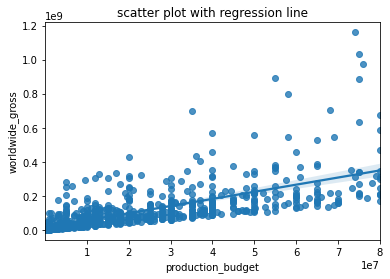

In [ ]:
sns.regplot(x='production_budget', y='worldwide_gross', data=roi)
plt.title('scatter plot with regression line')
plt.show

In [ ]:
X = roi['production_budget']
Y = roi['worldwide_gross']
X_plus_c = sm.add_constant(X)
model = sm.OLS(Y, X_plus_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     558.4
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.22e-92
Time:                        20:22:26   Log-Likelihood:                -14494.
No. Observations:                 731   AIC:                         2.899e+04
Df Residuals:                     729   BIC:                         2.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.571e+07   5.63e+06      2.789      0.005    4.65e+06    2.68e+07
production_budget     4.1761      0.177     23.630      0.000       3.829       4.523
==============================================================================
Omnibus:                      583.254   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12546.463
Skew:                           3.478   Prob(JB):                         0.00
Kurtosis:                      22.067   Cond. No.                     4.91e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

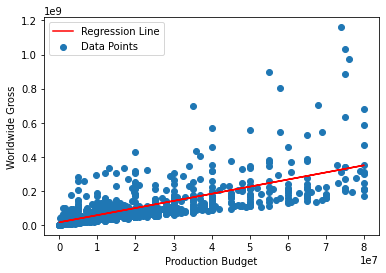

In [ ]:
intercept, slope = model.params

# Create a scatter plot of the data points
plt.scatter(X, roi['worldwide_gross'], label='Data Points')

# Create the regression line using the model parameters
regression_line = intercept + slope * X
plt.plot(X, regression_line, color='red', label='Regression Line')

# Add labels and a legend
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.legend()

# Show the plot
plt.show()

In [ ]:
model.predict([1,1000000])

array([19885514.56929909])

production budget explains 43% of the variation in worldwide gross. 

In [ ]:
model.tvalues

const                 2.789066
production_budget    23.630397
dtype: float64

In [ ]:
model.pvalues

const                5.423929e-03
production_budget    4.218768e-92
dtype: float64

In [ ]:
model.mse_total

1.7261126892773774e+16

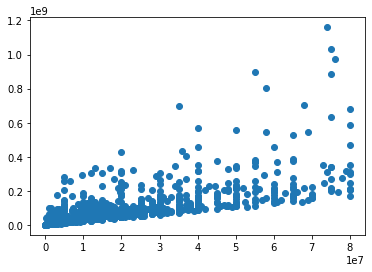

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X, Y)

In [ ]:
roi['genres'].value_counts().sort_index().head(20)

In [ ]:
roi['ROI'].describe()

In [ ]:
roi["movie"].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x=roi['production_budget'], y=roi["worldwide_gross"])
ax.set_title("Production budget and worldwide gross")
ax.legend();

In [ ]:
roi.plot(x='production_budget', y="worldwide_gross", kind='scatter');

In [ ]:
pd.set_option('display.float_format', lambda x: '{:.1f}'.format(x))

# Now when you describe the DataFrame, it will show numbers without scientific notation
print(roi.describe())

In [ ]:
roi['ROI'].median()

In [ ]:
plt.figure(figsize=(5, 6))
sns.kdeplot(roi['ROI'], color='skyblue', shade=True)
plt.title('Density Plot of ROI')
plt.xlabel('ROI')
plt.ylabel('Density')
plt.show()

In [ ]:
genre_roi = roi.groupby('genres')['ROI'].count().sort_values(ascending=False)
genre_roi.head(60)

In [ ]:
roi['genres'].values_counts()

In [ ]:
genre_roi = roi.groupby('genres')['ROI'].mean().sort_values(ascending=False)

top_8_genres = genre_roi.head(10)

# Create a bar plot for the top 8 genres
plt.figure(figsize=(12, 6))
# Define the colors for the bars
colors = ['skyblue'] * len(top_8_genres)
# Set a different color for the top bar
colors[0] = 'orange'

top_8_genres.plot(kind='bar', color=colors)
plt.title('Top 8 Genres with Highest Median ROI')
plt.xlabel('Genre')
plt.ylabel('Median ROI')
plt.xticks(rotation=45)
plt.show()

In [ ]:
genre_roi = roi.groupby('production_budget')['ROI'].median().sort_values(ascending=False)


production_budget = roi['production_budget']
worldwide_gross = roi['worldwide_gross']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, worldwide_gross, color='blue', alpha=0.5)
plt.title('Scatter Plot of Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()

In [ ]:
median_roi_all = roi['ROI'].median()

# Calculate the median ROI for each unique production budget
median_roi = roi.groupby('production_budget')['ROI'].median().reset_index()

# Extract data for scatter plot
production_budget = median_roi['production_budget']
median_roi_values = median_roi['ROI']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, median_roi_values, color='blue', alpha=0.5)
plt.axhline(y=median_roi_all, color='red', linestyle='--', label=f'Median ROI: {median_roi_all:.1f}')
plt.title('Scatter Plot of Production Budget vs. Median ROI')
plt.xlabel('Production Budget')
plt.ylabel('Median ROI')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
roi_sorted = roi.sort_values(by='production_budget')

# Extract the data
production_budget = roi_sorted['production_budget']
worldwide_gross = roi_sorted['worldwide_gross']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(production_budget, worldwide_gross, color='blue', marker='o', linestyle='-')
plt.title('Line Plot of Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')

# Format the y-axis labels to display full numbers, not in scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.show()

In [ ]:
production_budget = roi['production_budget']
worldwide_gross = roi['worldwide_gross']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, worldwide_gross, color='blue', alpha=0.7)
plt.title('Scatter Plot of Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')

# Format the axis labels to display full numbers, not in scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.grid(True)
plt.show()

In [ ]:
median_roi_by_month = roi.groupby('release_month')['ROI'].sum().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a bar plot
plt.figure(figsize=(10, 6))
median_roi_by_month.plot(kind='bar', color='skyblue')
plt.title('Sum ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Median ROI')
plt.xticks(rotation=0)
plt.show()

In [ ]:
drama_df = roi[roi['genres'].str.contains('Horror,Mystery,Thriller', na=False)]

# Group the filtered data by release month and calculate the median ROI
median_roi_by_month = drama_df.groupby('release_month')['ROI'].sum().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a bar plot
plt.figure(figsize=(20, 10))
median_roi_by_month.plot(kind='bar', color='skyblue')
plt.title('Median ROI for Horror, Mystery, Thriller Genre by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Median ROI')
plt.xticks(rotation=0)
plt.show()

In [ ]:
roi.to_csv("movie_studio_df.csv")